✅ Libraries imported successfully
✅ Data loaded successfully
Dataset shape: (392692, 16)
Date range: 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Unique customers: 4,338
Reference date for recency calculation: 2011-12-10 12:50:00

✅ RFM metrics calculated
Total customers: 4338

First 5 customers:
📊 RFM METRICS SUMMARY
           Recency    Frequency       Monetary
count  4338.000000  4338.000000    4338.000000
mean     92.536422     4.272015    2048.688081
std     100.014169     7.697998    8985.230220
min       1.000000     1.000000       3.750000
25%      18.000000     1.000000     306.482500
50%      51.000000     2.000000     668.570000
75%     142.000000     5.000000    1660.597500
max     374.000000   209.000000  280206.020000


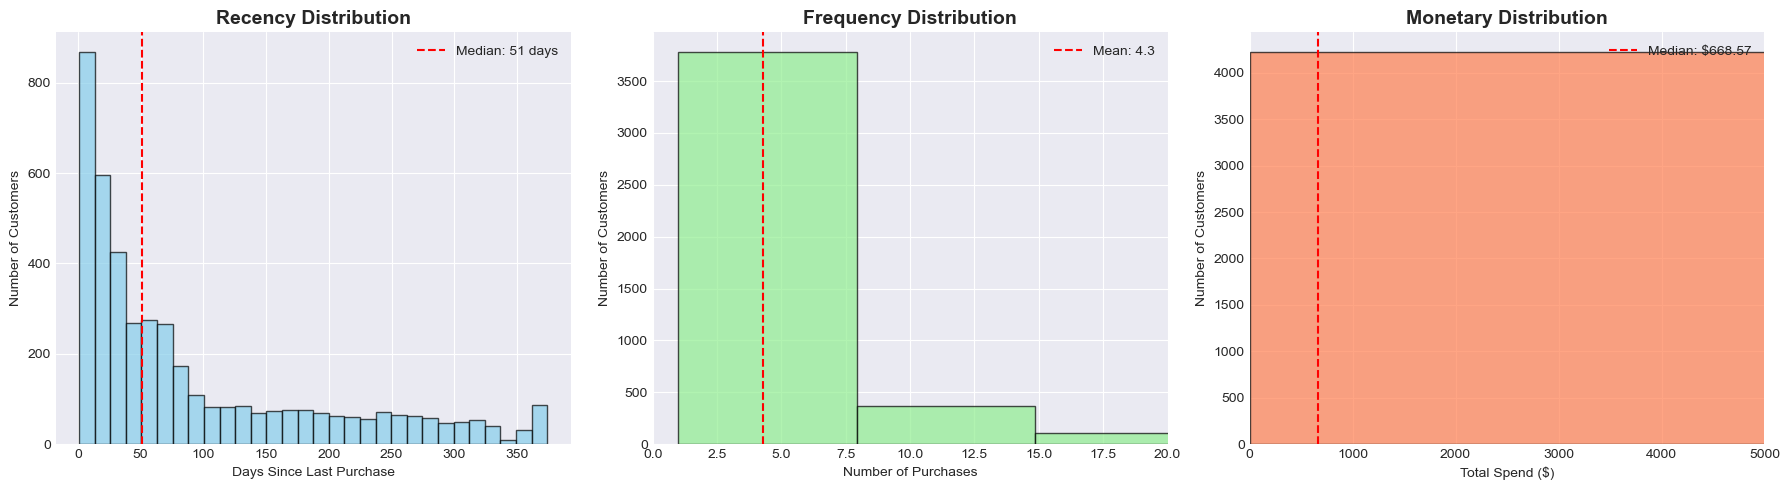

✅ RFM scores calculated

First 5 customers with scores:


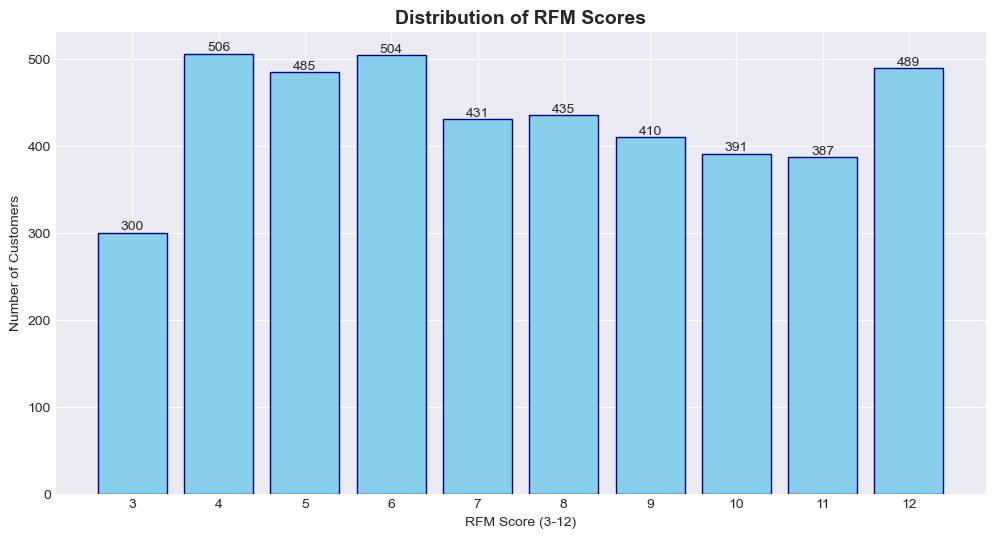


📊 RFM SCORE DISTRIBUTION
Score 3:   300 customers (6.9%)
Score 4:   506 customers (11.7%)
Score 5:   485 customers (11.2%)
Score 6:   504 customers (11.6%)
Score 7:   431 customers (9.9%)
Score 8:   435 customers (10.0%)
Score 9:   410 customers (9.5%)
Score 10:   391 customers (9.0%)
Score 11:   387 customers (8.9%)
Score 12:   489 customers (11.3%)
✅ Customer segments created

Segment distribution:


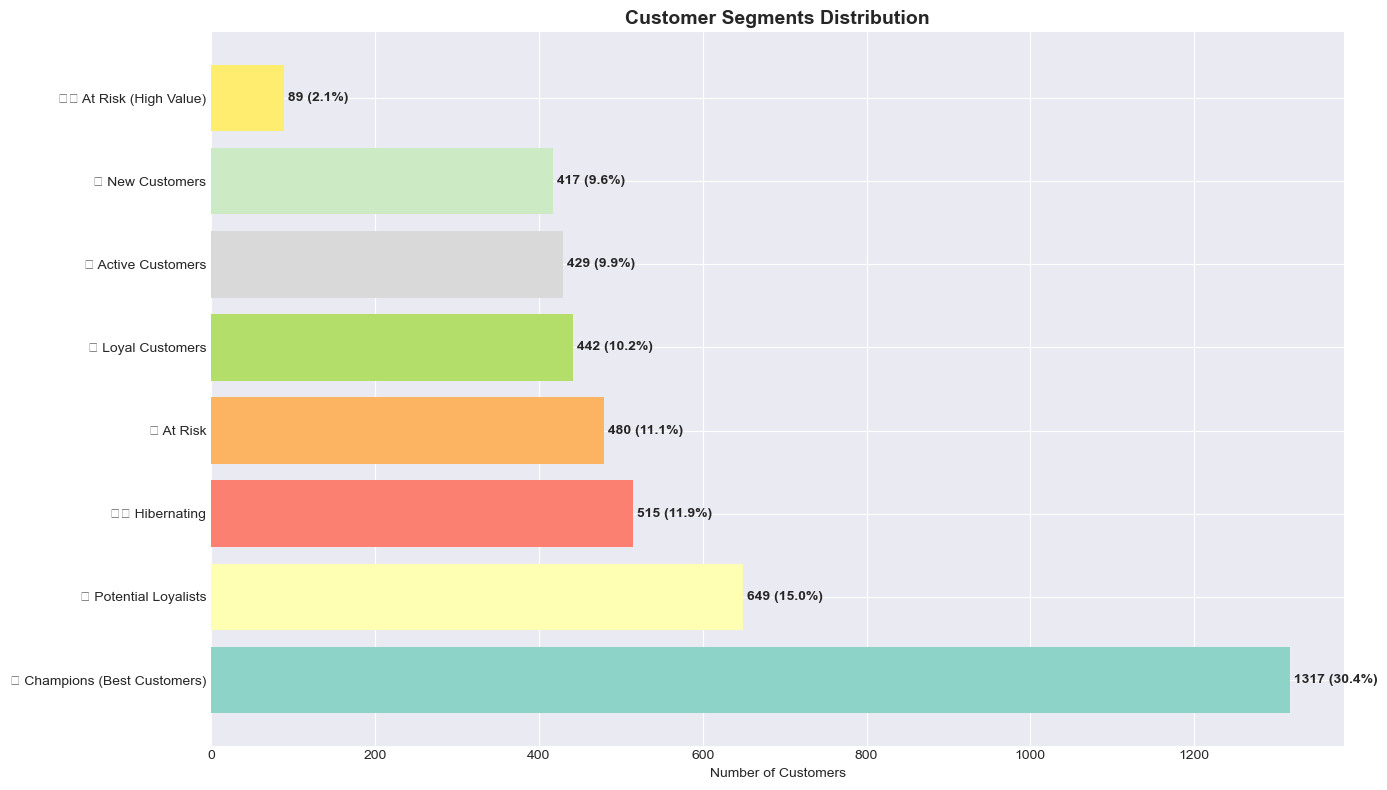

📊 SEGMENT PERFORMANCE ANALYSIS
                     Segment  Customer_Count  Avg_Recency  Avg_Frequency  Avg_Monetary  Total_Revenue  Customer_%  Revenue_%
⭐ Champions (Best Customers)            1317        17.11           9.39       4926.88     6488695.17        30.4       73.0
       📈 Potential Loyalists             649        83.93           3.60       1435.89      931892.70        15.0       10.5
           💎 Loyal Customers             442        23.11           2.33       1063.44      470040.22        10.2        5.3
                   🔴 At Risk             480       242.10           1.56        797.76      382926.64        11.1        4.3
     ⚠️ At Risk (High Value)              89       201.48           4.53       2634.60      234479.09         2.1        2.6
             👋 New Customers             417        84.91           1.14        398.79      166297.07         9.6        1.9
          🚀 Active Customers             429        25.79           1.31        291.37      12

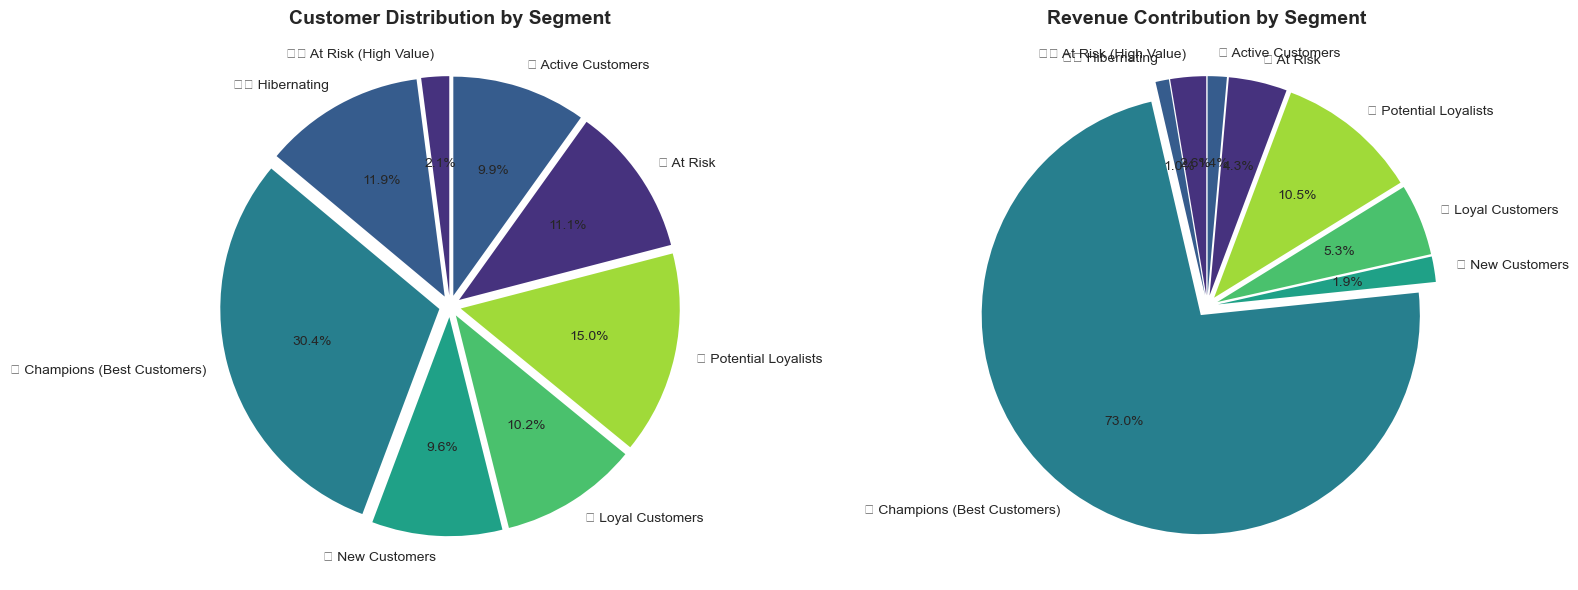

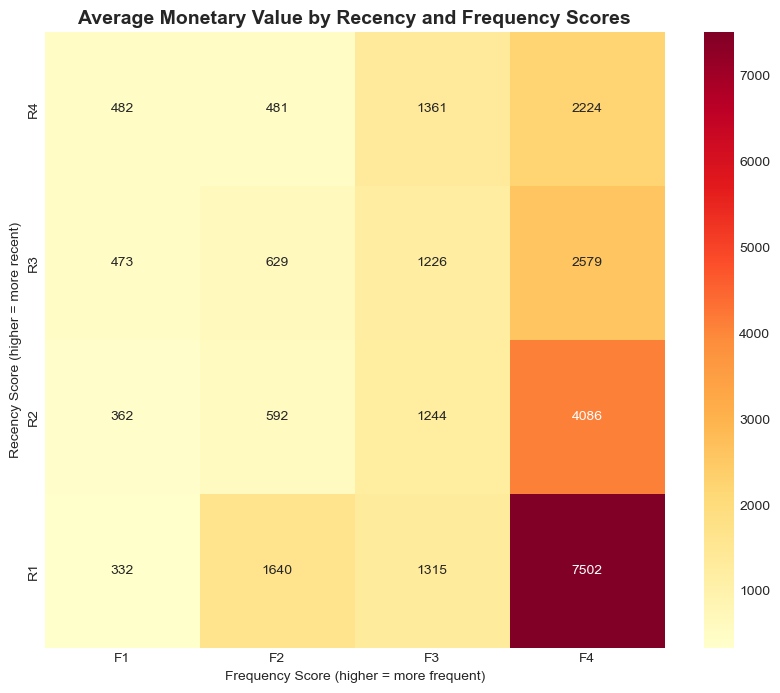

🎯 KEY SEGMENT INSIGHTS

🌟 TOP 3 MOST VALUABLE SEGMENTS:
--------------------------------------------------
⭐ Champions (Best Customers):
   • 1317 customers (30.4%)
   • Total Revenue: $6,488,695.17 (73.0%)
   • Avg Spend per Customer: $4,926.88
📈 Potential Loyalists:
   • 649 customers (15.0%)
   • Total Revenue: $931,892.70 (10.5%)
   • Avg Spend per Customer: $1,435.89
💎 Loyal Customers:
   • 442 customers (10.2%)
   • Total Revenue: $470,040.22 (5.3%)
   • Avg Spend per Customer: $1,063.44

⚠️ AT-RISK SEGMENTS (Need Attention):
--------------------------------------------------
⚠️ At Risk (High Value): 89 customers, $234,479.09 at risk
🔴 At Risk: 480 customers, $382,926.64 at risk

💰 Potential Revenue at Risk: $617,405.73

📋 ACTIONABLE MARKETING RECOMMENDATIONS

⭐ Champions (Best Customers):
   ✓ VIP treatment - Exclusive offers and early access
   ✓ Loyalty rewards program
   ✓ Ask for reviews and referrals
   ✓ Personalized thank you notes

💎 Loyal Customers:
   ✓ Upsell and cros

In [2]:
# %% [markdown]
# # Step 3: RFM Customer Segmentation
# ## Recency, Frequency, Monetary Analysis

# %% [markdown]
# ### Import Libraries

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("viridis")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully")

# %% [markdown]
# ### Load Enhanced Data

# %%
# Load the enhanced dataset from Step 2
df = pd.read_csv('../data/processed/online_retail_enhanced.csv')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

print(f"✅ Data loaded successfully")
print(f"Dataset shape: {df.shape}")
print(f"Date range: {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")
print(f"Unique customers: {df['CustomerID'].nunique():,}")

# %% [markdown]
# ## What is RFM Analysis?
# 
# **Recency**: How recently did the customer purchase?
# **Frequency**: How often do they purchase?
# **Monetary**: How much do they spend?
# 
# This helps segment customers into meaningful groups for targeted marketing.

# %% [markdown]
# ### Step 1: Calculate RFM Metrics

# %%
# Set reference date (day after last purchase in dataset)
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
print(f"Reference date for recency calculation: {reference_date}")

# Calculate RFM metrics for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (reference_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalRevenue': 'sum'  # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("\n✅ RFM metrics calculated")
print(f"Total customers: {len(rfm)}")
print("\nFirst 5 customers:")
rfm.head()

# %% [markdown]
# ### Step 2: Explore RFM Distributions

# %%
# Statistical summary
print("📊 RFM METRICS SUMMARY")
print("=" * 50)
print(rfm[['Recency', 'Frequency', 'Monetary']].describe())

# %%
# Visualize RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Recency distribution
axes[0].hist(rfm['Recency'], bins=30, edgecolor='black', alpha=0.7, color='skyblue')
axes[0].axvline(rfm['Recency'].median(), color='red', linestyle='--', label=f'Median: {rfm["Recency"].median():.0f} days')
axes[0].set_title('Recency Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Days Since Last Purchase')
axes[0].set_ylabel('Number of Customers')
axes[0].legend()

# Frequency distribution
axes[1].hist(rfm['Frequency'], bins=30, edgecolor='black', alpha=0.7, color='lightgreen')
axes[1].axvline(rfm['Frequency'].mean(), color='red', linestyle='--', label=f'Mean: {rfm["Frequency"].mean():.1f}')
axes[1].set_title('Frequency Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Purchases')
axes[1].set_ylabel('Number of Customers')
axes[1].legend()
axes[1].set_xlim(0, 20)  # Focus on common range

# Monetary distribution
axes[2].hist(rfm['Monetary'], bins=30, edgecolor='black', alpha=0.7, color='coral')
axes[2].axvline(rfm['Monetary'].median(), color='red', linestyle='--', label=f'Median: ${rfm["Monetary"].median():.2f}')
axes[2].set_title('Monetary Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Total Spend ($)')
axes[2].set_ylabel('Number of Customers')
axes[2].legend()
axes[2].set_xlim(0, 5000)  # Focus on common range

plt.tight_layout()
plt.show()

# %% [markdown]
# ### Step 3: Create RFM Scores

# %%
# Create quartiles for each metric
# For Recency, lower is better (more recent)
recency_labels = [4, 3, 2, 1]  # 4 = best (most recent), 1 = worst
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=4, labels=recency_labels)

# For Frequency and Monetary, higher is better
frequency_labels = [1, 2, 3, 4]  # 4 = best (most frequent)
monetary_labels = [1, 2, 3, 4]    # 4 = best (highest spending)

rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=4, labels=frequency_labels)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=4, labels=monetary_labels)

# Convert scores to integers
rfm['R_Score'] = rfm['R_Score'].astype(int)
rfm['F_Score'] = rfm['F_Score'].astype(int)
rfm['M_Score'] = rfm['M_Score'].astype(int)

# Calculate RFM Score (combined)
rfm['RFM_Score'] = rfm['R_Score'] + rfm['F_Score'] + rfm['M_Score']

print("✅ RFM scores calculated")
print("\nFirst 5 customers with scores:")
rfm.head()

# %% [markdown]
# ### Step 4: Analyze Score Distribution

# %%
# Distribution of RFM scores
score_distribution = rfm['RFM_Score'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
bars = plt.bar(score_distribution.index, score_distribution.values, color='skyblue', edgecolor='navy')
plt.title('Distribution of RFM Scores', fontsize=14, fontweight='bold')
plt.xlabel('RFM Score (3-12)')
plt.ylabel('Number of Customers')
plt.xticks(range(3, 13))

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}', ha='center', va='bottom')

plt.show()

print("\n📊 RFM SCORE DISTRIBUTION")
print("=" * 50)
for score in range(3, 13):
    count = len(rfm[rfm['RFM_Score'] == score])
    percentage = (count/len(rfm))*100
    print(f"Score {score}: {count:5d} customers ({percentage:.1f}%)")

# %% [markdown]
# ### Step 5: Create Customer Segments

# %%
# Define customer segments based on RFM scores
def segment_customers(row):
    if row['R_Score'] >= 3 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return '⭐ Champions (Best Customers)'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 2 and row['M_Score'] >= 2:
        return '💎 Loyal Customers'
    elif row['R_Score'] >= 3 and row['F_Score'] >= 1 and row['M_Score'] >= 1:
        return '🚀 Active Customers'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 2 and row['M_Score'] >= 2:
        return '📈 Potential Loyalists'
    elif row['R_Score'] >= 2 and row['F_Score'] >= 1 and row['M_Score'] >= 1:
        return '👋 New Customers'
    elif row['R_Score'] >= 1 and row['F_Score'] >= 3 and row['M_Score'] >= 3:
        return '⚠️ At Risk (High Value)'
    elif row['R_Score'] >= 1 and row['F_Score'] >= 1 and row['M_Score'] >= 2:
        return '🔴 At Risk'
    elif row['R_Score'] >= 1 and row['F_Score'] >= 1 and row['M_Score'] >= 1:
        return '❄️ Hibernating'
    elif row['R_Score'] == 1 and row['F_Score'] == 1 and row['M_Score'] == 1:
        return '💔 Lost Customers'
    else:
        return '📊 Other'

# Apply segmentation
rfm['Segment'] = rfm.apply(segment_customers, axis=1)

print("✅ Customer segments created")
print("\nSegment distribution:")
segment_counts = rfm['Segment'].value_counts()
segment_counts

# %% [markdown]
# ### Step 6: Visualize Segments

# %%
# Plot segment distribution
plt.figure(figsize=(14, 8))
colors = plt.cm.Set3(np.linspace(0, 1, len(segment_counts)))
bars = plt.barh(range(len(segment_counts)), segment_counts.values, color=colors)
plt.yticks(range(len(segment_counts)), segment_counts.index)
plt.xlabel('Number of Customers')
plt.title('Customer Segments Distribution', fontsize=14, fontweight='bold')

# Add value labels
for i, (bar, (segment, count)) in enumerate(zip(bars, segment_counts.items())):
    plt.text(count, bar.get_y() + bar.get_height()/2, 
             f' {count} ({count/len(rfm)*100:.1f}%)', 
             va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### Step 7: Analyze Segment Performance

# %%
# Calculate metrics for each segment
segment_analysis = rfm.groupby('Segment').agg({
    'CustomerID': 'count',
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'sum']
}).round(2)

segment_analysis.columns = ['Customer_Count', 'Avg_Recency', 'Avg_Frequency', 'Avg_Monetary', 'Total_Revenue']
segment_analysis = segment_analysis.reset_index()

# Add percentage columns
segment_analysis['Customer_%'] = (segment_analysis['Customer_Count'] / len(rfm) * 100).round(1)
segment_analysis['Revenue_%'] = (segment_analysis['Total_Revenue'] / segment_analysis['Total_Revenue'].sum() * 100).round(1)

print("📊 SEGMENT PERFORMANCE ANALYSIS")
print("=" * 80)
print(segment_analysis.sort_values('Total_Revenue', ascending=False).to_string(index=False))

# %%
# Visualize segment contribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Customer count pie chart
axes[0].pie(segment_analysis['Customer_Count'], labels=segment_analysis['Segment'], 
            autopct='%1.1f%%', startangle=90, explode=[0.05]*len(segment_analysis))
axes[0].set_title('Customer Distribution by Segment', fontsize=14, fontweight='bold')

# Revenue contribution pie chart
axes[1].pie(segment_analysis['Total_Revenue'], labels=segment_analysis['Segment'], 
            autopct='%1.1f%%', startangle=90, explode=[0.05]*len(segment_analysis))
axes[1].set_title('Revenue Contribution by Segment', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# %% [markdown]
# ### Step 8: RFM Heatmap

# %%
# Create RFM matrix heatmap
rfm_matrix = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean').round(2)

plt.figure(figsize=(10, 8))
sns.heatmap(rfm_matrix, annot=True, fmt='.0f', cmap='YlOrRd', 
            xticklabels=['F1', 'F2', 'F3', 'F4'],
            yticklabels=['R4', 'R3', 'R2', 'R1'])
plt.title('Average Monetary Value by Recency and Frequency Scores', fontsize=14, fontweight='bold')
plt.xlabel('Frequency Score (higher = more frequent)')
plt.ylabel('Recency Score (higher = more recent)')
plt.show()

# %% [markdown]
# ### Step 9: Key Segment Insights

# %%
# Identify top segments by value
top_segments = segment_analysis.nlargest(3, 'Total_Revenue')[['Segment', 'Customer_Count', 'Total_Revenue', 'Avg_Monetary']]
at_risk_segments = segment_analysis[segment_analysis['Segment'].str.contains('Risk|Lost')]

print("=" * 80)
print("🎯 KEY SEGMENT INSIGHTS")
print("=" * 80)

print("\n🌟 TOP 3 MOST VALUABLE SEGMENTS:")
print("-" * 50)
for _, row in top_segments.iterrows():
    print(f"{row['Segment']}:")
    print(f"   • {row['Customer_Count']} customers ({row['Customer_Count']/len(rfm)*100:.1f}%)")
    print(f"   • Total Revenue: ${row['Total_Revenue']:,.2f} ({row['Total_Revenue']/segment_analysis['Total_Revenue'].sum()*100:.1f}%)")
    print(f"   • Avg Spend per Customer: ${row['Avg_Monetary']:,.2f}")

print("\n⚠️ AT-RISK SEGMENTS (Need Attention):")
print("-" * 50)
for _, row in at_risk_segments.iterrows():
    print(f"{row['Segment']}: {row['Customer_Count']} customers, ${row['Total_Revenue']:,.2f} at risk")

# Calculate retention opportunity
retention_value = at_risk_segments['Total_Revenue'].sum()
print(f"\n💰 Potential Revenue at Risk: ${retention_value:,.2f}")

# %% [markdown]
# ### Step 10: Actionable Recommendations by Segment

# %%
print("\n" + "=" * 80)
print("📋 ACTIONABLE MARKETING RECOMMENDATIONS")
print("=" * 80)

recommendations = {
    '⭐ Champions (Best Customers)': [
        "✓ VIP treatment - Exclusive offers and early access",
        "✓ Loyalty rewards program",
        "✓ Ask for reviews and referrals",
        "✓ Personalized thank you notes"
    ],
    '💎 Loyal Customers': [
        "✓ Upsell and cross-sell related products",
        "✓ Birthday/anniversary special offers",
        "✓ Create a tiered loyalty program to move them to Champions"
    ],
    '🚀 Active Customers': [
        "✓ Engage with personalized recommendations",
        "✓ Send regular newsletters with new arrivals",
        "✓ Offer bundle deals to increase order value"
    ],
    '📈 Potential Loyalists': [
        "✓ Encourage second purchase with discount codes",
        "✓ Product recommendations based on first purchase",
        "✓ Email follow-ups with social proof"
    ],
    '👋 New Customers': [
        "✓ Welcome email series",
        "✓ First-purchase follow-up for feedback",
        "✓ Educational content about products"
    ],
    '⚠️ At Risk (High Value)': [
        "✓ IMMEDIATE ACTION: Reach out with 'We miss you' offers",
        "✓ Survey to understand why they stopped",
        "✓ Exclusive comeback discount (20-30% off)"
    ],
    '🔴 At Risk': [
        "✓ Re-engagement email campaign",
        "✓ Limited-time offers",
        "✓ Show new products since their last visit"
    ],
    '❄️ Hibernating': [
        "✓ Win-back campaigns with strong incentives",
        "✓ Remind them of brand value",
        "✓ Consider if retention cost > customer value"
    ],
    '💔 Lost Customers': [
        "✓ Final re-engagement attempt",
        "✓ Survey to understand churn reasons",
        "✓ Focus resources on higher-value segments"
    ]
}

for segment, recs in recommendations.items():
    if segment in rfm['Segment'].unique():
        print(f"\n{segment}:")
        for rec in recs:
            print(f"   {rec}")

# %% [markdown]
# ### Step 11: Save RFM Results

# %%
# Save RFM data for backend use
rfm_output_path = '../data/processed/rfm_segments.csv'
rfm.to_csv(rfm_output_path, index=False)

# Create summary for dashboard
segment_summary = segment_analysis[['Segment', 'Customer_Count', 'Total_Revenue', 'Avg_Monetary', 'Customer_%', 'Revenue_%']]
summary_path = '../data/processed/segment_summary.csv'
segment_summary.to_csv(summary_path, index=False)

print(f"✅ RFM segments saved to: {rfm_output_path}")
print(f"✅ Segment summary saved to: {summary_path}")

# %%
# Final summary
print("\n" + "=" * 80)
print("📊 RFM ANALYSIS COMPLETE - KEY TAKEAWAYS")
print("=" * 80)
print(f"• Total customers analyzed: {len(rfm):,}")
print(f"• Number of segments identified: {rfm['Segment'].nunique()}")
print(f"• Top segment: {segment_analysis.loc[segment_analysis['Total_Revenue'].idxmax(), 'Segment']}")
print(f"• Customers needing attention: {at_risk_segments['Customer_Count'].sum():,}")
print(f"• Revenue at risk: ${at_risk_segments['Total_Revenue'].sum():,.2f}")
print(f"• Champions (best customers): {len(rfm[rfm['Segment'] == '⭐ Champions (Best Customers)']):,}")
print("\n✅ Ready for backend integration!")